In [1]:
%matplotlib inline

In [2]:
# Import dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

610

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that the Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | pitimbu
Processing Record 3 of Set 1 | miri
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | siemiatycze
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | tiznit
Processing Record 11 of Set 1 | taltal
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | zyrardow
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | cockburn town
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | nishihara
Processing Record 20 of Set 1 | fort saint john
City not found. Skipping...
Proce

Processing Record 38 of Set 4 | sabang
Processing Record 39 of Set 4 | port alfred
Processing Record 40 of Set 4 | atambua
Processing Record 41 of Set 4 | bambous virieux
Processing Record 42 of Set 4 | qaanaaq
Processing Record 43 of Set 4 | salalah
Processing Record 44 of Set 4 | fortuna
Processing Record 45 of Set 4 | tubuala
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 4 | marsh harbour
Processing Record 48 of Set 4 | arraial do cabo
Processing Record 49 of Set 4 | mossendjo
Processing Record 50 of Set 4 | ribeira grande
Processing Record 1 of Set 5 | saint-georges
Processing Record 2 of Set 5 | sayabec
City not found. Skipping...
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | boa vista
Processing Record 5 of Set 5 | atar
Processing Record 6 of Set 5 | neftcala
Processing Record 7 of Set 5 | hamilton
Processing Record 8 of Set 5 | nicoya
Processing Record 9 of Set 5 | yar-sale
Processing Record 10 of Se

Processing Record 28 of Set 8 | colares
Processing Record 29 of Set 8 | pangkalanbuun
Processing Record 30 of Set 8 | topchikha
Processing Record 31 of Set 8 | muros
Processing Record 32 of Set 8 | torbay
Processing Record 33 of Set 8 | kaitangata
Processing Record 34 of Set 8 | anapskaya
Processing Record 35 of Set 8 | camacha
Processing Record 36 of Set 8 | chernyshevskiy
Processing Record 37 of Set 8 | port-gentil
Processing Record 38 of Set 8 | tolstoy-yurt
Processing Record 39 of Set 8 | port elizabeth
Processing Record 40 of Set 8 | presidencia roque saenz pena
Processing Record 41 of Set 8 | fairbanks
Processing Record 42 of Set 8 | severnyy
Processing Record 43 of Set 8 | temaraia
City not found. Skipping...
Processing Record 44 of Set 8 | port lincoln
Processing Record 45 of Set 8 | sakaiminato
Processing Record 46 of Set 8 | le vauclin
Processing Record 47 of Set 8 | esperance
Processing Record 48 of Set 8 | buraydah
Processing Record 49 of Set 8 | bathsheba
Processing Record

Processing Record 14 of Set 12 | torzhok
Processing Record 15 of Set 12 | kattivakkam
Processing Record 16 of Set 12 | edd
Processing Record 17 of Set 12 | las vegas
Processing Record 18 of Set 12 | thale
Processing Record 19 of Set 12 | airai
Processing Record 20 of Set 12 | ulaanbaatar
Processing Record 21 of Set 12 | raudeberg
Processing Record 22 of Set 12 | aberdeen
Processing Record 23 of Set 12 | novobelokatay
Processing Record 24 of Set 12 | tonj
Processing Record 25 of Set 12 | haibowan
City not found. Skipping...
Processing Record 26 of Set 12 | soe
Processing Record 27 of Set 12 | gunnedah
Processing Record 28 of Set 12 | mormugao
Processing Record 29 of Set 12 | cootamundra
Processing Record 30 of Set 12 | aasiaat
Processing Record 31 of Set 12 | bull savanna
Processing Record 32 of Set 12 | dekar
Processing Record 33 of Set 12 | ambon
Processing Record 34 of Set 12 | riyadh
Processing Record 35 of Set 12 | tromso
Processing Record 36 of Set 12 | clyde river
Processing Reco

In [11]:
len(city_data)

563

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pitimbu,-7.4706,-34.8086,79.39,75,50,17.49,BR,2021-08-06 20:19:46
1,Miri,4.4148,114.0089,77.14,94,20,2.30,MY,2021-08-06 20:19:46
2,Hermanus,-34.4187,19.2345,53.91,82,0,5.66,ZA,2021-08-06 20:19:46
3,Kruisfontein,-34.0033,24.7314,50.88,91,7,3.20,ZA,2021-08-06 20:19:47
4,Avarua,-21.2078,-159.7750,77.05,78,20,10.36,CK,2021-08-06 20:19:47
5,Siemiatycze,52.4272,22.8623,61.25,98,100,13.42,PL,2021-08-06 20:19:47
6,Talnakh,69.4865,88.3972,63.86,41,22,1.74,RU,2021-08-06 20:19:48
7,Hilo,19.7297,-155.0900,78.53,84,90,8.05,US,2021-08-06 20:16:09
8,Tiznit,29.5833,-9.5000,68.67,76,0,4.97,MA,2021-08-06 20:19:48
9,Taltal,-25.4000,-70.4833,61.75,66,23,7.38,CL,2021-08-06 20:19:48


In [13]:
# Reorder the columns of the city_data DataFrame.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pitimbu,BR,2021-08-06 20:19:46,-7.4706,-34.8086,79.39,75,50,17.49
1,Miri,MY,2021-08-06 20:19:46,4.4148,114.0089,77.14,94,20,2.30
2,Hermanus,ZA,2021-08-06 20:19:46,-34.4187,19.2345,53.91,82,0,5.66
3,Kruisfontein,ZA,2021-08-06 20:19:47,-34.0033,24.7314,50.88,91,7,3.20
4,Avarua,CK,2021-08-06 20:19:47,-21.2078,-159.7750,77.05,78,20,10.36
5,Siemiatycze,PL,2021-08-06 20:19:47,52.4272,22.8623,61.25,98,100,13.42
6,Talnakh,RU,2021-08-06 20:19:48,69.4865,88.3972,63.86,41,22,1.74
7,Hilo,US,2021-08-06 20:16:09,19.7297,-155.0900,78.53,84,90,8.05
8,Tiznit,MA,2021-08-06 20:19:48,29.5833,-9.5000,68.67,76,0,4.97
9,Taltal,CL,2021-08-06 20:19:48,-25.4000,-70.4833,61.75,66,23,7.38


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

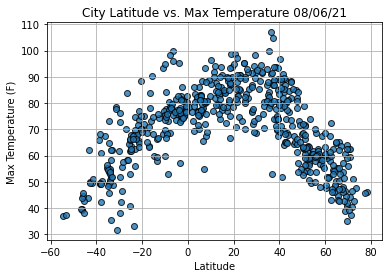

In [16]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

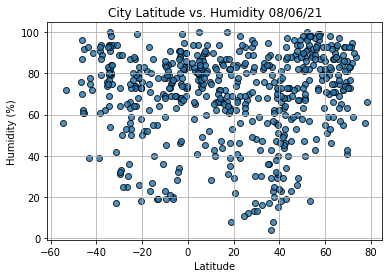

In [26]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

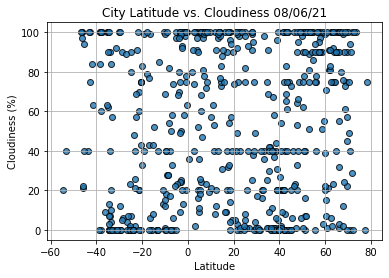

In [27]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

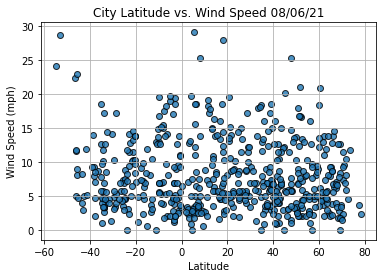

In [28]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

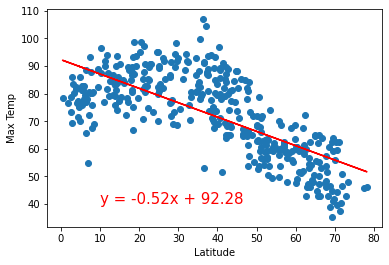

In [39]:
# Linear regression on the Northern Hemisphere Max Temp.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature", "Max Temp",(10,40))

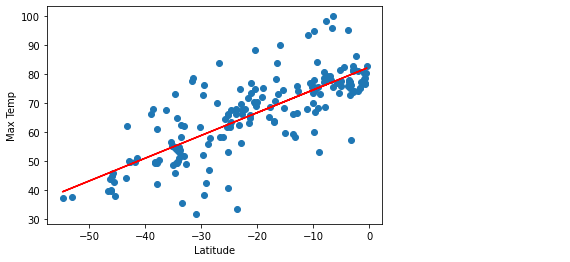

In [40]:
# Linear regression on the Southern Hemisphere Max Temp.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature", "Max Temp",(10,40))

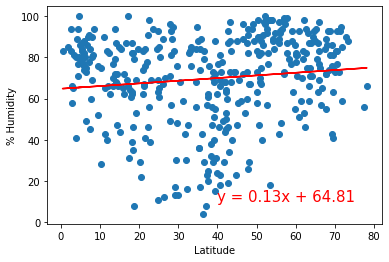

In [41]:
# Linear regression on the Northern Hemisphere % Humidity.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for % Humidity", "% Humidity",(40,10))

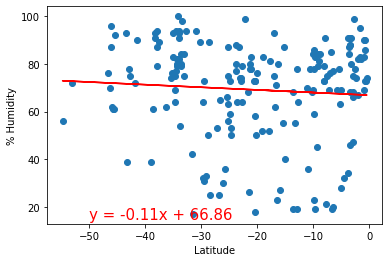

In [42]:
# Linear regression on the Southern Hemisphere % Humidity.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \
                      for % Humidity", "% Humidity",(-50,15))

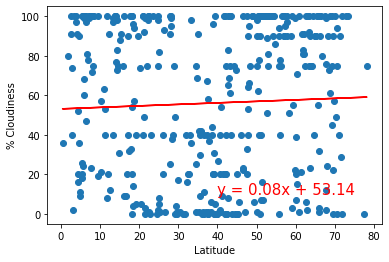

In [43]:
# Linear regression on the Northern Hemisphere % Cloudiness.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for % Cloudiness", "% Cloudiness",(40,10))

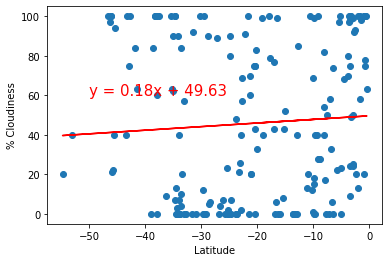

In [46]:
# Linear regression on the Southern Hemisphere % Humidity.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for % Cloudiness", "% Cloudiness",(-50,60))

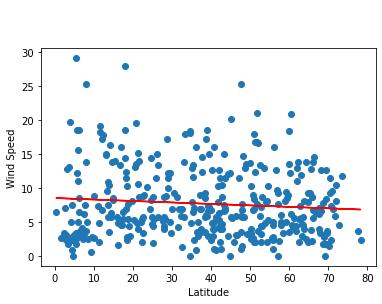

In [47]:
# Linear regression on the Northern Hemisphere Wind Speed.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for Wind Speed", "Wind Speed",(40,35))

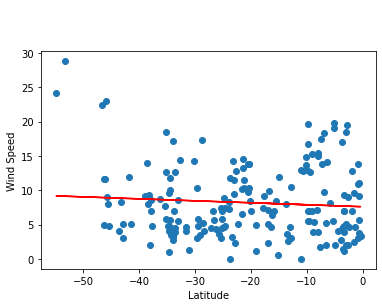

In [48]:
# Linear regression on the Southern Hemisphere Wind Speed.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for Wind Speed", "Wind Speed",(-50,35))